# Análise de Índices Macroeconômicos para Sugestionamento de Pilar de Investimento

## Instalação/Referência de bibliotecas utilizadas

In [314]:
!pip install pandas
!pip install seaborn --upgrade
!pip install sklearn --upgrade
!pip install scikit-learn --upgrade
!pip install plotly --upgrade
!pip install Orange3

In [315]:
import numpy as np
import pandas as pd
import datetime

#Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import plotly.express as px

#Configurando as biblioteca
##Seaborn
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,5)})
##Pandas - Mostrar todas as colunas do Dataframe
pd.set_option("display.max_columns", None)

## Importação e tratativa inicial dos dados

### Taxas

#### Taxa Selic

In [316]:
selic = pd.read_csv('dados/Selic.csv',sep=';')

In [317]:
selic.dtypes

Data     object
Valor    object
dtype: object

In [318]:
selic.head(1)

,Data,Valor
0,01/01/2010,"8,75"


In [319]:
#Padronizando a nomenclatura das colunas
selic.rename(columns={'Data' : 'DATA_PREGAO', 'Valor' : 'SELIC'}, inplace = True)

#Padronizando a coluna DATA_PREGAO
selic['DATA_PREGAO'] = pd.to_datetime(selic['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
selic['SELIC'] = selic['SELIC'].apply(lambda x: x.replace(',', '.'))
selic['SELIC'] = pd.to_numeric(selic['SELIC'], downcast='float')

#Criando índice
selic.set_index('DATA_PREGAO', inplace=True)

In [320]:
selic.dtypes

SELIC    float32
dtype: object

In [321]:
selic.head(1)

,SELIC
DATA_PREGAO,
2010-01-01,8.75


#### Taxa Câmbio: Dólar

In [322]:
dolar = pd.read_csv('dados/Dolar.csv', sep=';',dtype='str')

In [323]:
dolar.dtypes

DATA       object
COLUNA1    object
COLUNA2    object
TIPO       object
COMPRA     object
VENDA      object
COLUNA3    object
COLUNA4    object
COLUNA5    object
dtype: object

In [324]:
dolar.head(1)

,DATA,COLUNA1,COLUNA2,TIPO,COMPRA,VENDA,COLUNA3,COLUNA4,COLUNA5
0,04012010,220,A,USD,"1,7232","1,7240","1,0000","1,0000",NaN


In [325]:
#Padronizando a nomenclatura das colunas
dolar.rename(columns={'DATA' : 'DATA_PREGAO', 'COMPRA' : 'DOLAR'}, inplace = True)

#Removendo colunas desnecessárias
dolar.drop(['COLUNA1', 'COLUNA2', 'TIPO', 'VENDA', 'COLUNA3', 'COLUNA4', 'COLUNA5'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
dolar['DATA_PREGAO'] = dolar['DATA_PREGAO'].apply(lambda x: x[0:2] + '/' + x[2:4] + '/' + x[4:])
dolar['DATA_PREGAO'] = pd.to_datetime(dolar['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
dolar['DOLAR'] = dolar['DOLAR'].apply(lambda x: x.replace(',', '.'))
dolar['DOLAR'] = pd.to_numeric(dolar['DOLAR'], downcast='float')

#Criando índice
dolar.set_index('DATA_PREGAO', inplace=True)

In [326]:
dolar.dtypes

DOLAR    float32
dtype: object

In [327]:
dolar.head(1)

,DOLAR
DATA_PREGAO,
2010-01-04,1.7232


### Commodities

#### Minério de Ferro Refinado

In [328]:
ferro = pd.read_csv('dados/Minerio_Ferro.csv', sep=',')

In [329]:
ferro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [330]:
ferro.head(1)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.12.2020,"155,84","155,84","155,84","155,84",-,"0,09%"


In [331]:
#Padronizando a nomenclatura das colunas
ferro.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'FERRO'}, inplace = True)

#Removendo colunas desnecessárias
ferro.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
ferro['DATA_PREGAO'] = ferro['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
ferro['DATA_PREGAO'] = pd.to_datetime(ferro['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
ferro['FERRO'] = ferro['FERRO'].apply(lambda x: x.replace(',', '.'))
ferro['FERRO'] = pd.to_numeric(ferro['FERRO'], downcast='float')

#Criando índice
ferro.set_index('DATA_PREGAO', inplace=True)

In [332]:
ferro.dtypes

FERRO    float32
dtype: object

In [333]:
ferro.head(1)

,FERRO
DATA_PREGAO,
2020-12-31,155.839996


#### Petróleo Brent Futuros

In [334]:
petroleo = pd.read_csv('dados/Petroleo_Brent.csv', sep=',')

In [335]:
petroleo.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [336]:
petroleo.head(1)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.12.2020,"51,80","51,49","51,84","50,90","133,22K","0,90%"


In [337]:
#Padronizando a nomenclatura das colunas
petroleo.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'PETROLEO', 'Vol.' : 'PETROLEO_VOLUME'}, inplace = True)

#Removendo colunas desnecessárias
petroleo.drop(['Abertura', 'Máxima', 'Mínima', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
petroleo['DATA_PREGAO'] = petroleo['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
petroleo['DATA_PREGAO'] = pd.to_datetime(petroleo['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
petroleo['PETROLEO'] = petroleo['PETROLEO'].apply(lambda x: x.replace(',', '.'))
petroleo['PETROLEO'] = pd.to_numeric(petroleo['PETROLEO'], downcast='float')

#Tratando o Volume
#    Verificando a contagem de registros que não tem o K
petroleo[~petroleo['PETROLEO_VOLUME'].str.contains("K")].count()
#    Substituindo o Valor - por 0 e o K multiplicado por 1.000
petroleo['PETROLEO_VOLUME'] = petroleo['PETROLEO_VOLUME'].apply(lambda x: float(x.replace('-', '0').replace(',', '.').replace('K', ''))*1000)  

#Criando índice
petroleo.set_index('DATA_PREGAO', inplace=True)

In [338]:
petroleo.dtypes

PETROLEO           float32
PETROLEO_VOLUME    float64
dtype: object

In [339]:
petroleo.head(1)

,PETROLEO,PETROLEO_VOLUME
DATA_PREGAO,,
2020-12-31,51.799999,133220.0


#### Ouro

In [340]:
ouro = pd.read_csv('dados/Ouro.csv', sep=',')

In [341]:
ouro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [342]:
ouro.head(1)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.12.2020,"1.905,80","1.910,00","1.915,20","1.902,90","0,73K","0,09%"


In [343]:
#Padronizando a nomenclatura das colunas
ouro.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'OURO', 'Vol.' : 'OURO_VOLUME'}, inplace = True)

#Removendo colunas desnecessárias
ouro.drop(['Abertura', 'Máxima', 'Mínima', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
ouro['DATA_PREGAO'] = ouro['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
ouro['DATA_PREGAO'] = pd.to_datetime(ouro['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
ouro['OURO'] = ouro['OURO'].apply(lambda x: x.replace('.', '').replace(',', '.'))
ouro['OURO'] = pd.to_numeric(ouro['OURO'], downcast='float')

#Tratando o Volume
ouro['OURO_VOLUME'] = ouro['OURO_VOLUME'].apply(lambda x: x.replace('-', '0'))
#    Verificando a contagem de registros que não tem o K ou 0
ouro[(~ouro['OURO_VOLUME'].str.contains('0')) & (~ouro['OURO_VOLUME'].str.contains('K'))].count()
#    Substituindo o Valor K multiplicado por 1.000
ouro['OURO_VOLUME'] = ouro['OURO_VOLUME'].apply(lambda x: float(x.replace(',', '.').replace('K', ''))*1000)  

#Criando índice
ouro.set_index('DATA_PREGAO', inplace=True)

In [344]:
ouro.dtypes

OURO           float32
OURO_VOLUME    float64
dtype: object

In [345]:
ouro.head(1)

,OURO,OURO_VOLUME
DATA_PREGAO,,
2020-12-31,1905.800049,730.0


### Índices

#### Índice Bovespa

In [346]:
bovespa = pd.read_csv('dados/Indice_Bovespa.csv')

In [347]:
bovespa.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [348]:
bovespa.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,68587.0,70081.0,68587.0,70045.0,70045.0,1655400.0


In [349]:
#Padronizando a nomenclatura das colunas
bovespa.rename(columns={'Date' : 'DATA_PREGAO', 'Close' : 'BOVESPA', 'Volume' : 'BOVESPA_VOLUME'}, inplace = True)

#Removendo colunas desnecessárias
bovespa.drop(['Open', 'High', 'Low', 'Adj Close'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
bovespa['DATA_PREGAO'] = pd.to_datetime(bovespa['DATA_PREGAO'])

#Padronizando a coluna de VALOR
bovespa['BOVESPA'] = bovespa['BOVESPA'].apply(lambda x: float(x))  

#Padronizando a coluna de VOLUME
bovespa['BOVESPA_VOLUME'] = bovespa['BOVESPA_VOLUME'].apply(lambda x: float(x))  

#Criando índice
bovespa.set_index('DATA_PREGAO', inplace=True)

In [350]:
bovespa.dtypes

BOVESPA           float64
BOVESPA_VOLUME    float64
dtype: object

In [351]:
bovespa.head(1)

,BOVESPA,BOVESPA_VOLUME
DATA_PREGAO,,
2010-01-04,70045.0,1655400.0


#### Índice S&P 500

In [352]:
sp500 = pd.read_csv('dados/Indice_S&P500.csv')

In [353]:
sp500.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [354]:
sp500.head(1)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.12.2020,"3.756,07","3.733,27","3.760,20","3.726,88",-,"0,64%"


In [355]:
#Padronizando a nomenclatura das colunas
sp500.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'SP500'}, inplace = True)

#Removendo colunas desnecessárias
sp500.drop(['Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
sp500['DATA_PREGAO'] = sp500['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
sp500['DATA_PREGAO'] = pd.to_datetime(sp500['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de VALOR
sp500['SP500'] = sp500['SP500'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))  

#Criando índice
sp500.set_index('DATA_PREGAO', inplace=True)

In [356]:
sp500.dtypes

SP500    float64
dtype: object

In [357]:
sp500.head(1)

,SP500
DATA_PREGAO,
2020-12-31,3756.07


## Unindo os Datasets

In [358]:
# Unindo todos os arquivos importados: sp500, bovespa, ouro, petroleo, ferro, dolar, selic
df = sp500.join(bovespa, how="inner")
df = df.join(ouro, how="inner")
df = df.join(petroleo, how="inner")
df = df.join(ferro, how="inner")
df = df.join(dolar, how="inner")
df = df.join(selic, how="inner")

#Ordenar dataframe pelo indice
df.sort_index(axis=0, ascending=True, inplace=True)

In [359]:
#Gerando colunas auxiliares para calculo
df.sort_index(ascending=True)

,SP500,BOVESPA,BOVESPA_VOLUME,OURO,OURO_VOLUME,PETROLEO,PETROLEO_VOLUME,FERRO,DOLAR,SELIC
DATA_PREGAO,,,,,,,,,,
2010-10-25,1185.62,69580.0,3836000.0,1338.300049,190.0,83.540001,199140.0,145.000000,1.7018,10.75
2010-10-26,1185.64,70740.0,2576800.0,1338.000000,200.0,83.660004,153050.0,145.100006,1.7037,10.75
2010-10-27,1182.45,70569.0,2202600.0,1322.199951,90.0,83.230003,187590.0,144.500000,1.7069,10.75
2010-10-28,1183.78,70320.0,2230200.0,1342.099976,190.0,83.589996,167930.0,144.000000,1.7104,10.75
2010-10-29,1183.26,70673.0,2208800.0,1357.099976,70.0,83.150002,197770.0,147.500000,1.7006,10.75
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,3687.26,116348.0,6947900.0,1880.000000,690.0,50.080002,194100.0,154.490005,5.1467,2.00
2020-12-23,3690.01,117857.0,6483300.0,1887.599976,440.0,51.200001,182630.0,154.500000,5.1734,2.00
2020-12-28,3735.36,119051.0,7171700.0,1890.800049,540.0,50.860001,81060.0,155.350006,5.2384,2.00


In [360]:
#Verificação de valores nulos nos itens do dataset
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["BOVESPA_VOLUME"].hasnans, df["OURO"].hasnans, df["OURO_VOLUME"].hasnans, df["PETROLEO"].hasnans, df["PETROLEO_VOLUME"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans

(False, True, True, False, False, False, False, False, False, False)

Devido a não haver negociações na B3 em feriados, a listagem abaixo justifica os dias em que apareceram como nulo no dataset:
- 2020-02-26: Quarta-feira de cinzas
- 2019-03-06: Quarta-feira de cinzas
- 2018-02-14: Quarta-feira de cinzas
- 2017-11-20: Dia Nacional da Consciência Negra

In [361]:
#Por se tratarem de poucos dias e em que não há negociação na B3 em são paulo vamos remover estas datas
df.dropna(subset = ["BOVESPA"], inplace=True) 

#Verificando seainda há valores nulos no dataframe
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["BOVESPA_VOLUME"].hasnans, df["OURO"].hasnans, df["OURO_VOLUME"].hasnans, df["PETROLEO"].hasnans, df["PETROLEO_VOLUME"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans

(False, False, False, False, False, False, False, False, False, False)

In [396]:
#Verificando métricas com valores zerados

df.query("SP500 ==0"), df["BOVESPA"].hasnans, df["BOVESPA_VOLUME"].hasnans, df["OURO"].hasnans, df["OURO_VOLUME"].hasnans, df["PETROLEO"].hasnans, df["PETROLEO_VOLUME"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans





(Empty DataFrame
 Columns: [SP500, BOVESPA, BOVESPA_VOLUME, OURO, OURO_VOLUME, PETROLEO, PETROLEO_VOLUME, FERRO, DOLAR, SELIC]
 Index: [],
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False)

In [363]:
#Verificando chaves duplicadas no dataframe
df.index.duplicated().sum()

0

In [364]:
df

,SP500,BOVESPA,BOVESPA_VOLUME,OURO,OURO_VOLUME,PETROLEO,PETROLEO_VOLUME,FERRO,DOLAR,SELIC
DATA_PREGAO,,,,,,,,,,
2010-10-25,1185.62,69580.0,3836000.0,1338.300049,190.0,83.540001,199140.0,145.000000,1.7018,10.75
2010-10-26,1185.64,70740.0,2576800.0,1338.000000,200.0,83.660004,153050.0,145.100006,1.7037,10.75
2010-10-27,1182.45,70569.0,2202600.0,1322.199951,90.0,83.230003,187590.0,144.500000,1.7069,10.75
2010-10-28,1183.78,70320.0,2230200.0,1342.099976,190.0,83.589996,167930.0,144.000000,1.7104,10.75
2010-10-29,1183.26,70673.0,2208800.0,1357.099976,70.0,83.150002,197770.0,147.500000,1.7006,10.75
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,3687.26,116348.0,6947900.0,1880.000000,690.0,50.080002,194100.0,154.490005,5.1467,2.00
2020-12-23,3690.01,117857.0,6483300.0,1887.599976,440.0,51.200001,182630.0,154.500000,5.1734,2.00
2020-12-28,3735.36,119051.0,7171700.0,1890.800049,540.0,50.860001,81060.0,155.350006,5.2384,2.00


## Exploração dos dados

### Verificando Outliers

#### SP500

In [365]:
#Verificando os quartis do valor
fig = px.box(df, x="SP500", title="Boxplot S&P 500")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

In [366]:
#Verificando range de valores
fig = px.histogram(df, x="SP500", title='Histograma S&P 500')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

In [367]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="SP500", title='Evolução S&P 500')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Data Pregão")
fig.show()

#### BOVESPA

In [368]:
fig = px.box(df, x="BOVESPA", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

In [369]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA", title='Histograma Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

In [370]:
#Há valores fora do quartil onde referem-se ao período de Dezembro de 2019 a Dezembro de 2020 onde houve a ocorrência do Coronavírus causando enorme variação nas bolsas mundiais
np.unique(df.query("BOVESPA > 113000").index.year), np.count_nonzero(np.unique(df.query("BOVESPA > 113000").index.date)), df.query("BOVESPA > 112000").index.min(), df.query("BOVESPA > 112000").index.max()

(array([2019, 2020], dtype=int64),
 57,
 Timestamp('2019-12-12 00:00:00'),
 Timestamp('2020-12-30 00:00:00'))

In [371]:
#Verificar período de pico do Índice Bovespa
fig = px.line(df, x=df.index, y="BOVESPA", title='Evolução Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Data Pregão")
fig.show()

In [372]:
#Removendo os dados do pico de 2019/2020
df = df.query("BOVESPA < 112000")
df.query("BOVESPA > 112000").index.min(), df.query("BOVESPA > 112000").index.max()

(NaT, NaT)

In [373]:
#Verificando como ficou a distribuição dos dados
fig = px.box(df, x="BOVESPA", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="ÍNDICE BOVESPA")
fig.show()

In [374]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA", title='Histograma Índice Bovespa')
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

In [375]:
#Verificar período de pico do Índice Bovespa
fig = px.line(df, x=df.index, y="BOVESPA", title='Evolução Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

#### BOVESPA_VOLUME

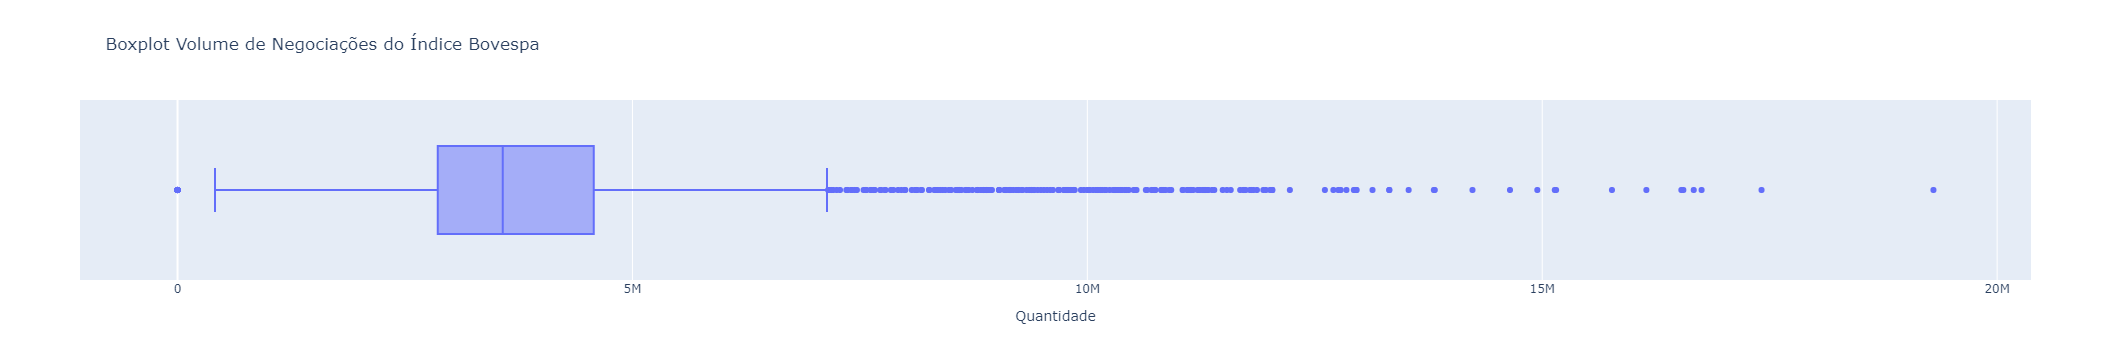

In [376]:
fig = px.box(df, x="BOVESPA_VOLUME", title="Boxplot Volume de Negociações do Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Quantidade")
fig.show()

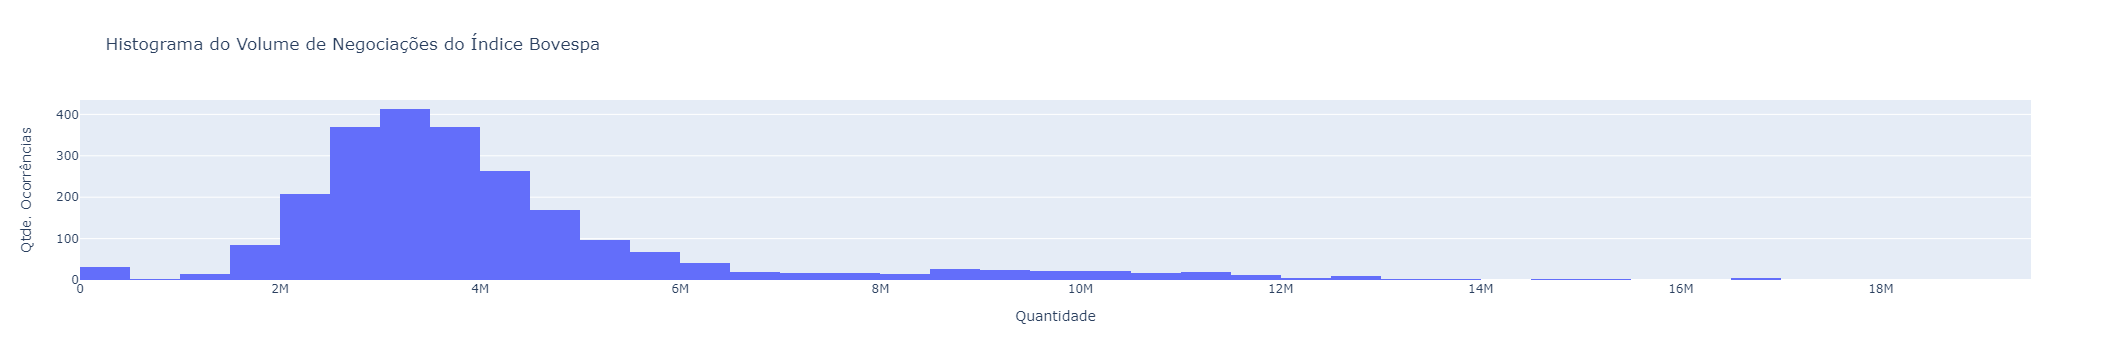

In [377]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA_VOLUME", title='Histograma do Volume de Negociações do Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Quantidade")
fig.show()

In [378]:
np.unique(df.query("BOVESPA_VOLUME > 5000000 | BOVESPA_VOLUME < 411000").index.year), np.count_nonzero(np.unique(df.query("BOVESPA_VOLUME > 5000000 | BOVESPA_VOLUME < 411000").index.date))

(array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
       dtype=int64),
 482)

In [379]:
# Por estes valores estarem dispostos em diversos anos da análise e alguns deles estarem diretamente ligados a acontecimentos específicos, deixaremos estes dados atrelados à análise

#### OURO


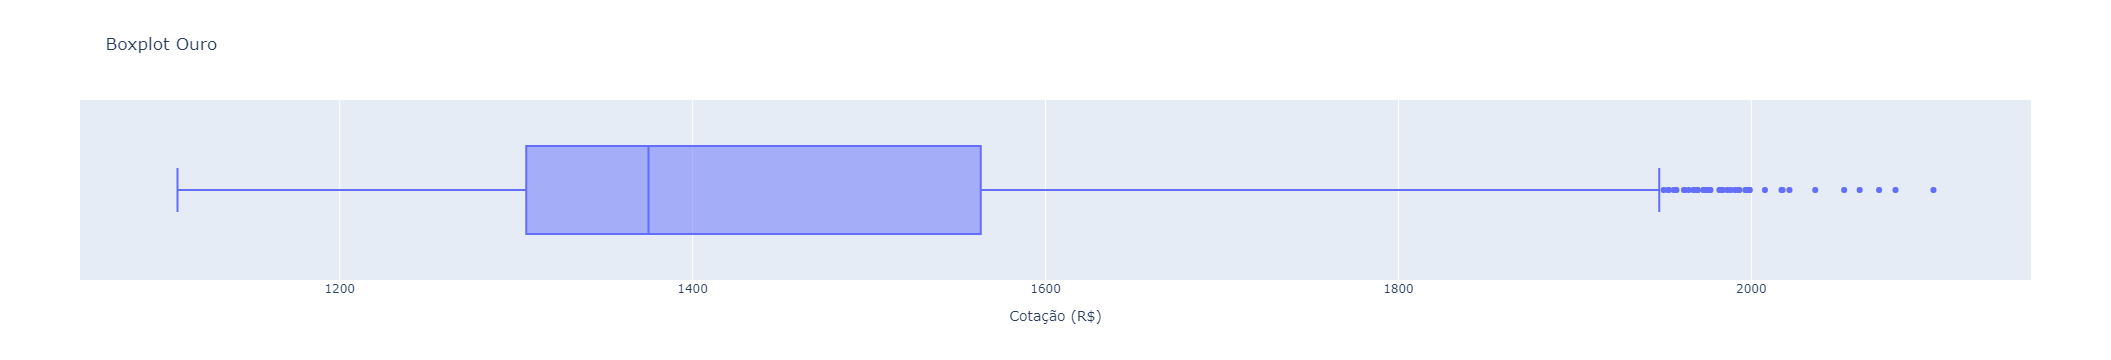

In [382]:
fig = px.box(df, x="OURO", title="Boxplot Ouro")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

In [383]:
#Encontramos mais 320 pregões espalhados por 3 anos
np.unique(df.query("OURO > 1800").index.year), np.count_nonzero(np.unique(df.query("OURO > 1700").index.date))

(array([2011, 2020], dtype=int64), 302)

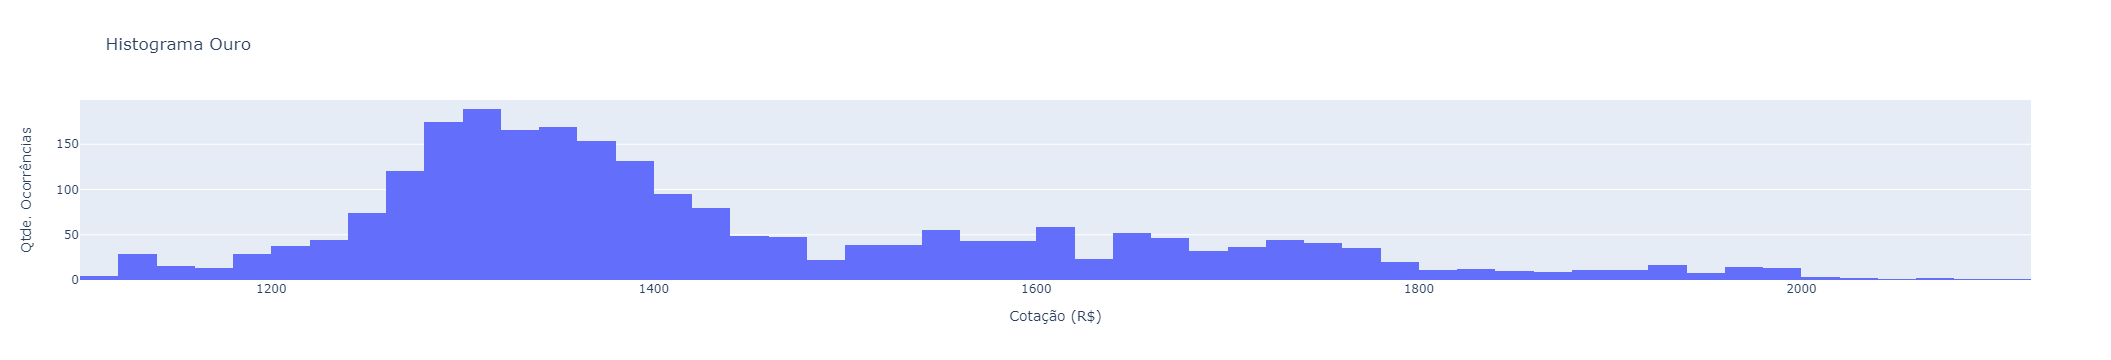

In [386]:
#Verificando range de valores
fig = px.histogram(df, x="OURO", title='Histograma Ouro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

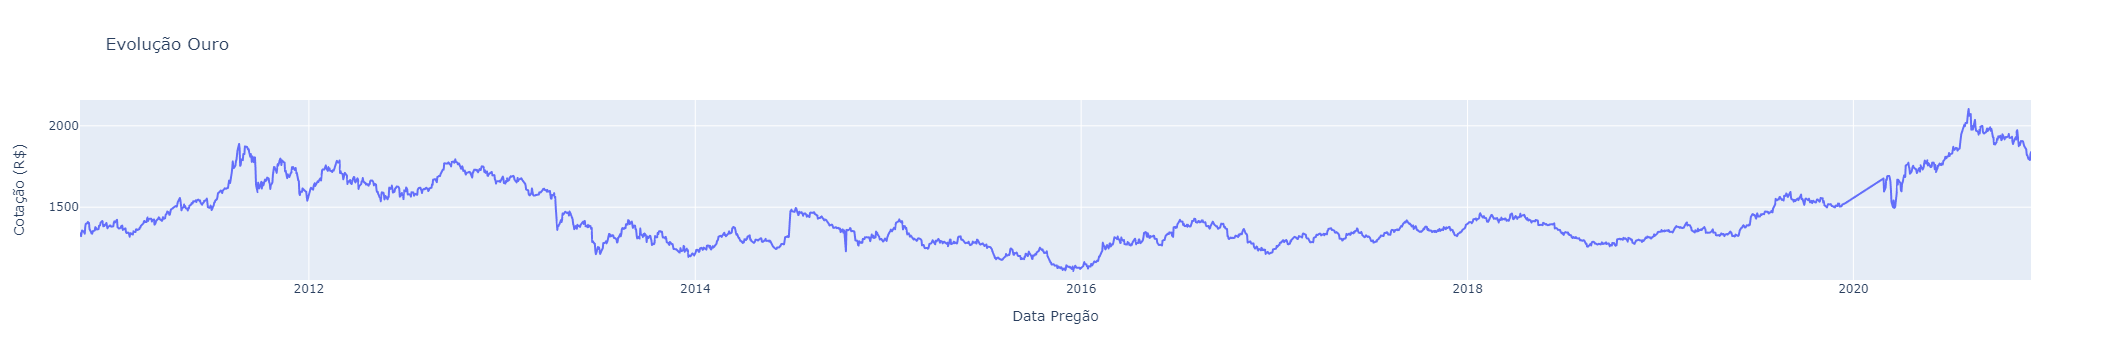

In [387]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="OURO", title='Evolução Ouro')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Data Pregão")
fig.show()

Geralmente a busca pelo ouro decorre da busca de aplicações consideradas mais seguras como metais preciosos
Segundo notícias isto ocorreu em 2011: http://g1.globo.com/economia/noticia/2011/08/ouro-supera-a-barreira-de-us-1700-a-onca-pela-primeira-vez.html e continuou por 2012. Em 2020 devido o advendo da pandemia houve também esta maior demanda desses metais preciosos batendo esta cotação de 2012 conforme notícias: https://www.infomoney.com.br/onde-investir/com-a-maior-cotacao-desde-2012-o-que-esperar-do-ouro-daqui-para-frente/

#### OURO_VOLUME


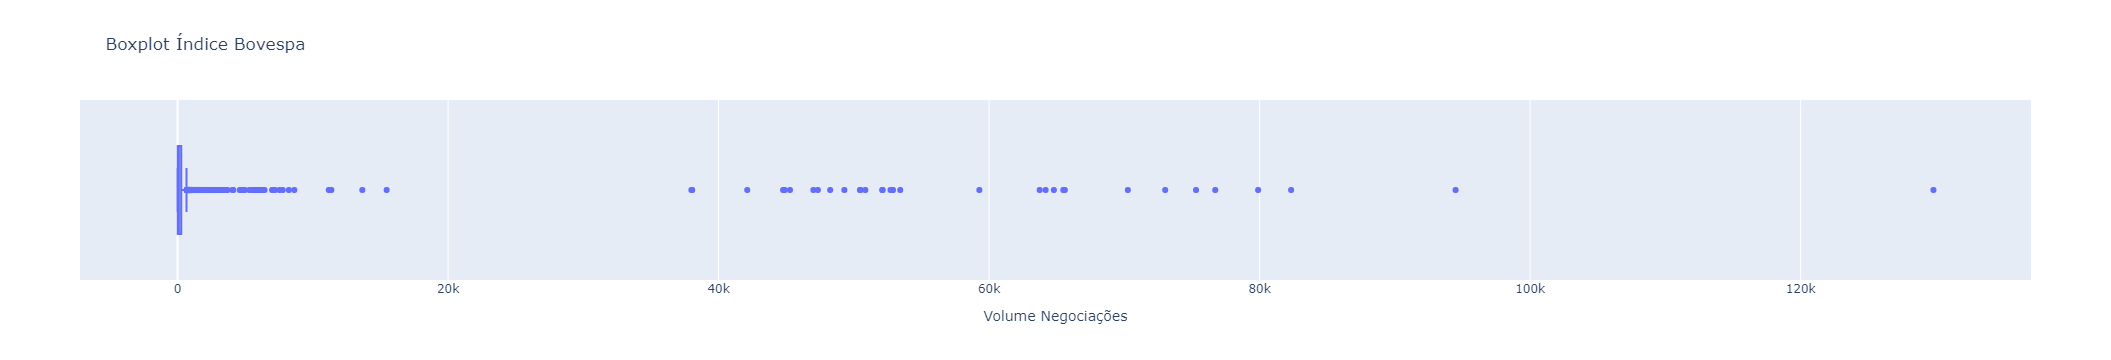

In [388]:
fig = px.box(df, x="OURO_VOLUME", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Volume Negociações")
fig.show()

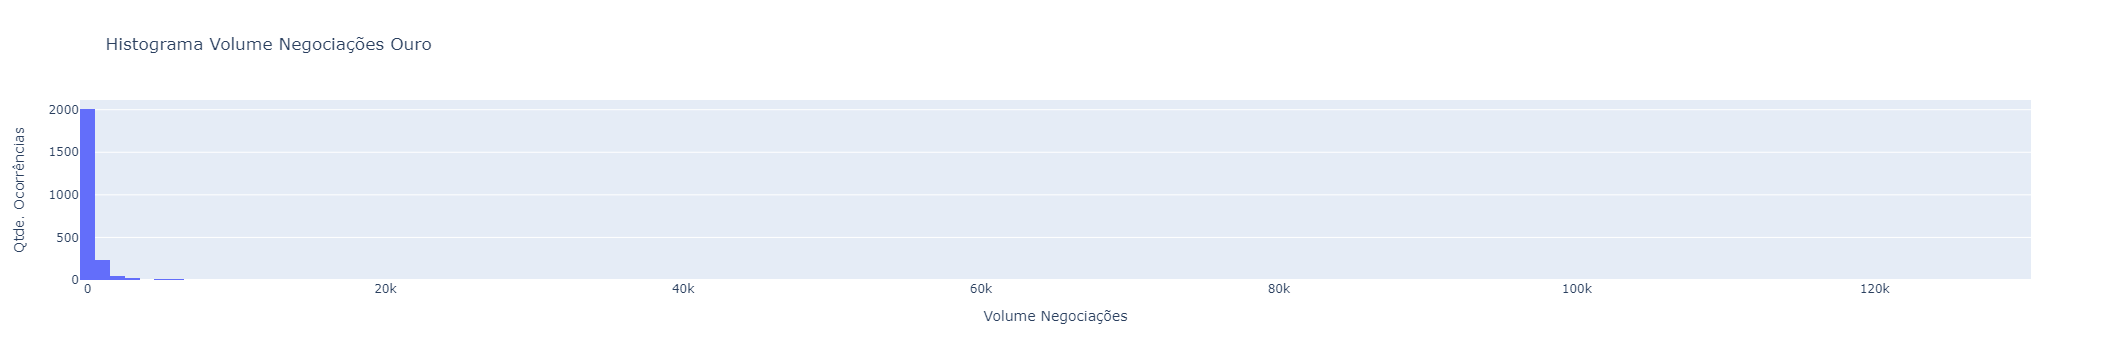

In [391]:
#Verificando range de valores
fig = px.histogram(df, x="OURO_VOLUME", title='Histograma Volume Negociações Ouro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Volume Negociações")
fig.show()

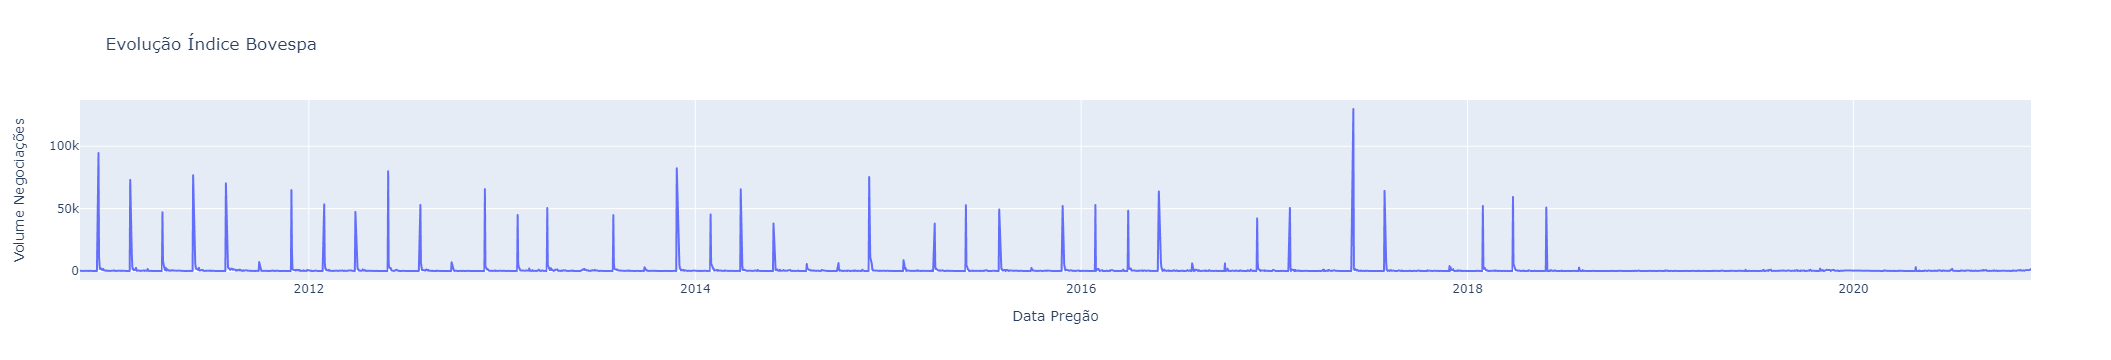

In [392]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="OURO_VOLUME", title='Evolução Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Volume Negociações", xaxis_title="Data Pregão")
fig.show()

In [393]:
#Definindo range de corte
np.unique(df.query("OURO_VOLUME > 2000").index.year), np.count_nonzero(np.unique(df.query("OURO_VOLUME > 2000").index.date))

(array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020],
       dtype=int64),
 102)

(array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020],
       dtype=int64),
 107)

In [70]:
#Retirando valores zerados para a negociação do Ouro
df = df.query("OURO_VOLUME > 0 & OURO_VOLUME < 2000")
df.query("OURO_VOLUME == 0").OURO_VOLUME.count()

0

<AxesSubplot:xlabel='OURO_VOLUME'>

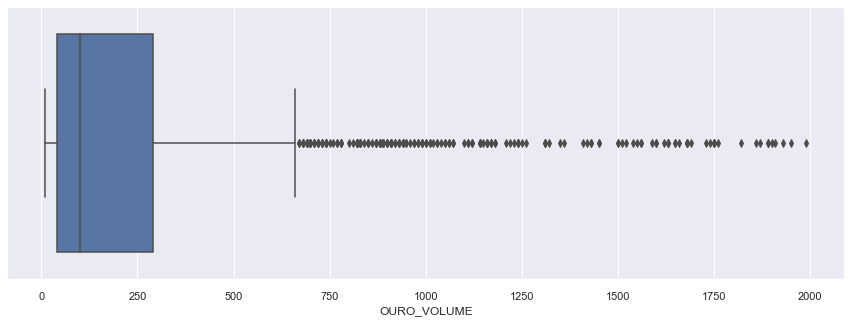

In [71]:
sns.boxplot(x=df["OURO_VOLUME"])

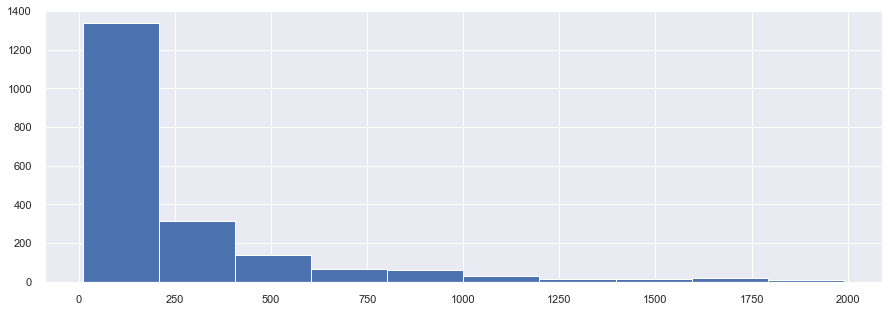

In [72]:
plt.hist(x=df['OURO_VOLUME']);

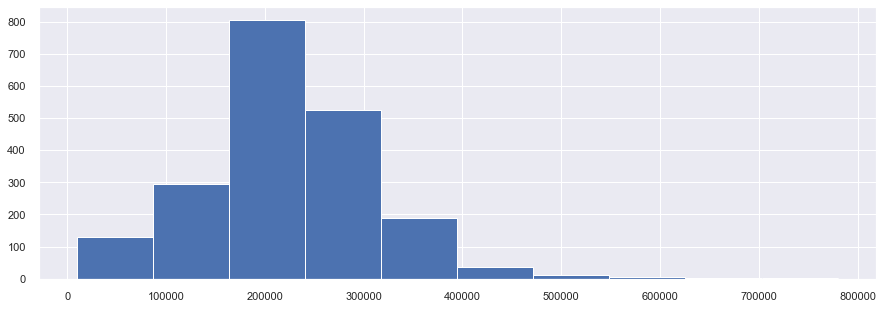

In [73]:
plt.hist(x=df['PETROLEO_VOLUME']);

#### PETROLEO
Náo houve a incidência de outliers para o preço do barril do petróleo

<AxesSubplot:xlabel='PETROLEO'>

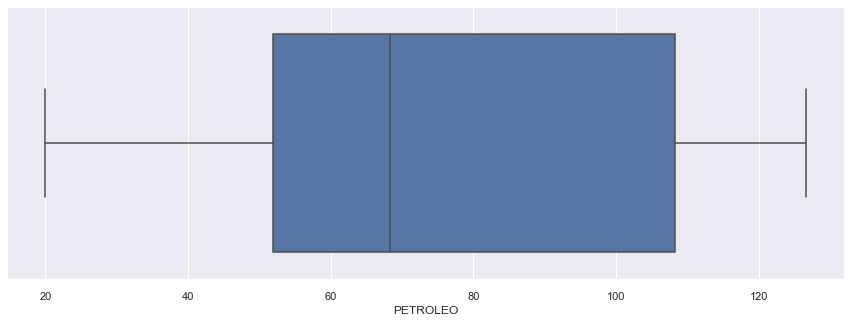

In [74]:
sns.boxplot(x=df["PETROLEO"])

#### PETROLEO_VOLUME

<AxesSubplot:xlabel='PETROLEO_VOLUME'>

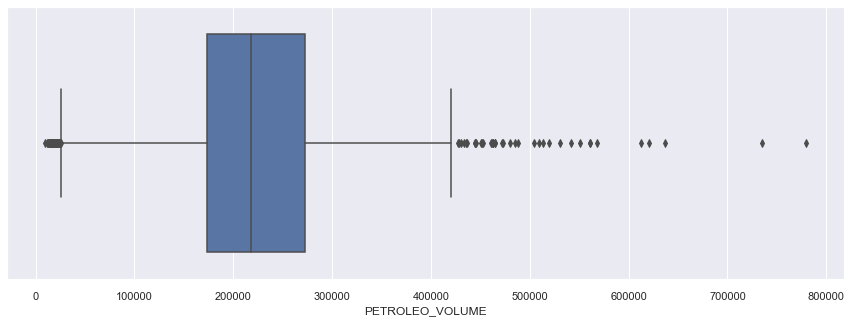

In [75]:
sns.boxplot(x=df["PETROLEO_VOLUME"])

In [76]:
#Retirando valores zerados para a negociação do Ouro
df.query("PETROLEO_VOLUME == 0").PETROLEO_VOLUME.count()

0

#### FERRO

<AxesSubplot:xlabel='FERRO'>

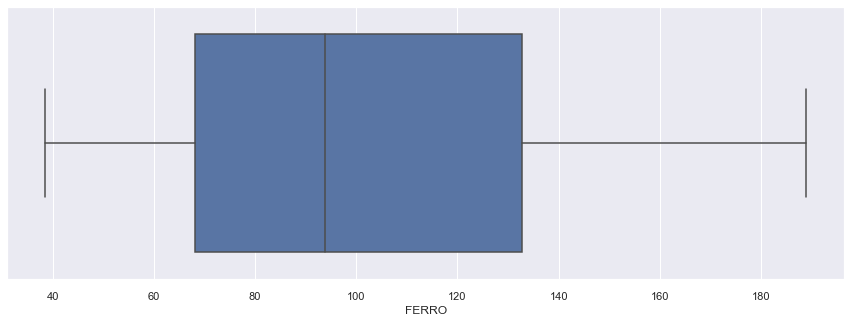

In [77]:
sns.boxplot(x=df["FERRO"])

#### DOLAR
Não foram encontrados outliers para a cotação do Dólar nestes últimos 10 anos

<AxesSubplot:xlabel='DOLAR'>

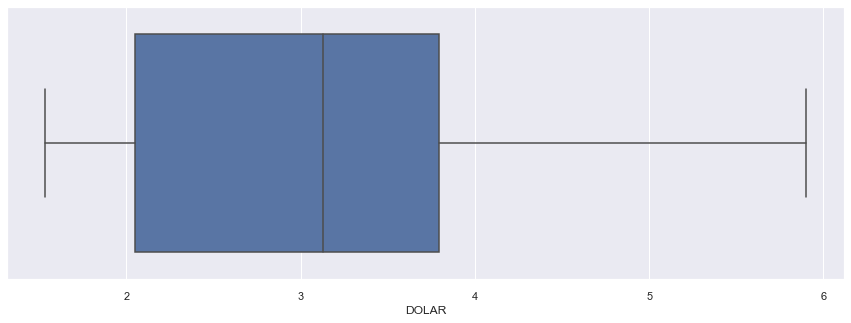

In [78]:
sns.boxplot(x=df["DOLAR"])

#### SELIC
Não foram encontrados outliers para a cotação da selic nos últimos 10 anos

<AxesSubplot:xlabel='SELIC'>

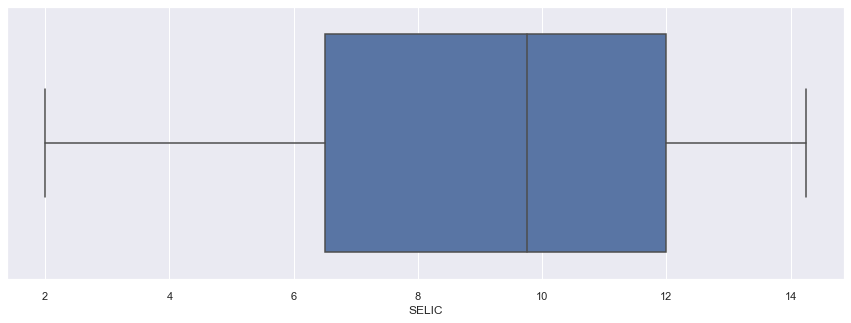

In [79]:
sns.boxplot(x=df["SELIC"])

## Feature engineering

### Criando métricas auxiliares

#### Métricas para cálculo

In [80]:
#Criando médias móveis para os dados
df['SP500_MM_30'] = df.SP500.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()
df['BOVESPA_VOLUME_MM_30'] = df.BOVESPA_VOLUME.rolling(30).mean().shift()
df['OURO_MM_30'] = df.OURO.rolling(30).mean().shift()
df['OURO_VOLUME_MM_30'] = df.OURO_VOLUME.rolling(30).mean().shift()
df['PETROLEO_MM_30'] = df.PETROLEO.rolling(30).mean().shift()
df['PETROLEO_VOLUME_MM_30'] = df.PETROLEO_VOLUME.rolling(30).mean().shift()
df['FERRO_MM_30'] = df.FERRO.rolling(30).mean().shift()
df['DOLAR_MM_30'] = df.DOLAR.rolling(30).mean().shift()
df['SELIC_MM_30'] = df.SELIC.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()

#Setar o fechamento do dia anterior
df['SP500_FECHAMENTO_ANTERIOR'] = df.SP500.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)
df['BOVESPA_VOLUME_FECHAMENTO_ANTERIOR'] = df.BOVESPA_VOLUME.shift(1)
df['OURO_FECHAMENTO_ANTERIOR'] = df.OURO.shift(1)
df['OURO_VOLUME_FECHAMENTO_ANTERIOR'] = df.OURO_VOLUME.shift(1)
df['PETROLEO_FECHAMENTO_ANTERIOR'] = df.PETROLEO.shift(1)
df['PETROLEO_VOLUME_FECHAMENTO_ANTERIOR'] = df.PETROLEO_VOLUME.shift(1)
df['FERRO_FECHAMENTO_ANTERIOR'] = df.FERRO.shift(1)
df['DOLAR_FECHAMENTO_ANTERIOR'] = df.DOLAR.shift(1)
df['SELIC_FECHAMENTO_ANTERIOR'] = df.SELIC.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)

In [81]:
#Para setar o resultado esperado criaremos estas variáveis para verificação
df['SP500_RESULT_30'] = df.SP500.shift(-30)
df['BOVESPA_RESULT_30'] = df.BOVESPA.shift(-30)
df['BOVESPA_VOLUME_RESULT_30'] = df.BOVESPA_VOLUME.shift(-30)
df['OURO_RESULT_30'] = df.OURO.shift(-30)
df['OURO_VOLUME_RESULT_30'] = df.OURO_VOLUME.shift(-30)
df['PETROLEO_RESULT_30'] = df.PETROLEO.shift(-30)
df['PETROLEO_VOLUME_RESULT_30'] = df.PETROLEO_VOLUME.shift(-30)
df['FERRO_RESULT_30'] = df.FERRO.shift(-30)
df['DOLAR_RESULT_30'] = df.DOLAR.shift(-30)
df['SELIC_RESULT_30'] = df.SELIC.shift(-30)

#Criando métricas condicionais para medir o retorno mínimo esperado e o maior retorno dentre os pilares de investimento
df['SP500_RESULT_DIFF'] = ((df.SP500_RESULT_30 / df.SP500_FECHAMENTO_ANTERIOR) - 1) * 100
df['BOVESPA_RESULT_DIFF'] = ((df.BOVESPA_RESULT_30 / df.BOVESPA_FECHAMENTO_ANTERIOR) - 1) * 100
df['OURO_RESULT_DIFF'] = ((df.OURO_RESULT_30 / df.OURO_FECHAMENTO_ANTERIOR) - 1) * 100
df['DOLAR_RESULT_DIFF'] = ((df.DOLAR_RESULT_30 / df.DOLAR_FECHAMENTO_ANTERIOR) - 1) * 100
df['SELIC_RESULT_DIFF'] = ((df.SELIC_RESULT_30 / df.SELIC_FECHAMENTO_ANTERIOR) - 1) * 100

In [82]:
#Removendo registros com valores nulos
df = df.dropna()

### Calculando o resultado esperado
0 - Não fazer nada
1 - Aplicar no índice Bovespa
2 - Aplicar em Dólar
3 - Aplicar em Ouro
4 - Aplicar em Selic
5 - ETF SP&500

In [83]:
# Gerar a métrica de resultados de acordo com os itens que foram definidos
condicoes = [    
(df['BOVESPA_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > 1)
, (df['DOLAR_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > 1)
, (df['OURO_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > 1)
, (df['SELIC_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > 1)
, (df['SP500_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > 1)
]

valores = [1, 2, 3, 4, 5]
descritivos_valores = ['NÃO FAZER NADA','ÍNDICE BOVESPA','DÓLAR','OURO','SELIC','SP&500']

df['RESULTADO'] = 0
df['RESULTADO'] = np.select(condicoes, valores)

In [84]:
#Conferência das métricas aplicadas
df.to_csv('saida/00_conferência.csv')

In [85]:
#Apagando colunas utilizadas para calcular o resultado e que não serão utilizadas na predição
df_predicao = df.drop(['SP500', 'BOVESPA', 'BOVESPA_VOLUME', 'OURO', 'OURO_VOLUME', 'PETROLEO', 'PETROLEO_VOLUME', 'FERRO', 'DOLAR'
                            , 'SELIC', 'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'BOVESPA_VOLUME_RESULT_30', 'OURO_RESULT_30', 'OURO_VOLUME_RESULT_30'
                            , 'PETROLEO_RESULT_30', 'PETROLEO_VOLUME_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30', 'SELIC_RESULT_30', 'SP500_RESULT_DIFF'
                            , 'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF', 'SELIC_RESULT_DIFF'], axis='columns')

In [86]:
#Comparando as colunas dos dataframes mostrando as colunas a serem utilizadas para a predição
df.columns, df_predicao.columns

(Index(['SP500', 'BOVESPA', 'BOVESPA_VOLUME', 'OURO', 'OURO_VOLUME', 'PETROLEO',
        'PETROLEO_VOLUME', 'FERRO', 'DOLAR', 'SELIC', 'SP500_MM_30',
        'BOVESPA_MM_30', 'BOVESPA_VOLUME_MM_30', 'OURO_MM_30',
        'OURO_VOLUME_MM_30', 'PETROLEO_MM_30', 'PETROLEO_VOLUME_MM_30',
        'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30',
        'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
        'BOVESPA_VOLUME_FECHAMENTO_ANTERIOR', 'OURO_FECHAMENTO_ANTERIOR',
        'OURO_VOLUME_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
        'PETROLEO_VOLUME_FECHAMENTO_ANTERIOR', 'FERRO_FECHAMENTO_ANTERIOR',
        'DOLAR_FECHAMENTO_ANTERIOR', 'SELIC_FECHAMENTO_ANTERIOR',
        'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'BOVESPA_VOLUME_RESULT_30',
        'OURO_RESULT_30', 'OURO_VOLUME_RESULT_30', 'PETROLEO_RESULT_30',
        'PETROLEO_VOLUME_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30',
        'SELIC_RESULT_30', 'SP500_RESULT_DIFF', 'BOVESPA_RESULT_DIFF',
        

##### Gerando os dados para submissão aos algorítimos

In [87]:
x_df_predicao = df_predicao.iloc[:,0:19].values
y_df_predicao = df_predicao.iloc[:,20:21].values

In [88]:
x_df_predicao, y_df_predicao

(array([[1.21933867e+03, 6.98296000e+04, 1.98451333e+06, ...,
         8.26700000e+04, 1.70000000e+02, 1.65020001e+00],
        [1.22215800e+03, 6.98542000e+04, 1.93755333e+06, ...,
         1.84630000e+05, 1.72100006e+02, 1.65480006e+00],
        [1.22518867e+03, 6.98659000e+04, 1.92863333e+06, ...,
         2.12400000e+05, 1.74500000e+02, 1.67050004e+00],
        ...,
        [3.38791400e+03, 9.73356333e+04, 9.35064000e+06, ...,
         2.50870000e+05, 1.16839996e+02, 5.69259977e+00],
        [3.39441000e+03, 9.74516333e+04, 9.45644000e+06, ...,
         2.19200000e+05, 1.16919998e+02, 5.56180000e+00],
        [3.40349400e+03, 9.76204333e+04, 9.44151000e+06, ...,
         2.55440000e+05, 1.17629997e+02, 5.53070021e+00]]),
 array([[4],
        [4],
        [4],
        ...,
        [1],
        [1],
        [1]]))

In [89]:
scaler_df = StandardScaler()

In [90]:
x_df_predicao

array([[1.21933867e+03, 6.98296000e+04, 1.98451333e+06, ...,
        8.26700000e+04, 1.70000000e+02, 1.65020001e+00],
       [1.22215800e+03, 6.98542000e+04, 1.93755333e+06, ...,
        1.84630000e+05, 1.72100006e+02, 1.65480006e+00],
       [1.22518867e+03, 6.98659000e+04, 1.92863333e+06, ...,
        2.12400000e+05, 1.74500000e+02, 1.67050004e+00],
       ...,
       [3.38791400e+03, 9.73356333e+04, 9.35064000e+06, ...,
        2.50870000e+05, 1.16839996e+02, 5.69259977e+00],
       [3.39441000e+03, 9.74516333e+04, 9.45644000e+06, ...,
        2.19200000e+05, 1.16919998e+02, 5.56180000e+00],
       [3.40349400e+03, 9.76204333e+04, 9.44151000e+06, ...,
        2.55440000e+05, 1.17629997e+02, 5.53070021e+00]])

In [91]:
x_df_predicao = scaler_df.fit_transform(x_df_predicao)

In [92]:
x_df_predicao

array([[-1.43701417,  0.17206734, -1.13390708, ..., -1.54912691,
         1.86356208, -1.31334922],
       [-1.43244179,  0.17341393, -1.15770291, ..., -0.41951485,
         1.91941874, -1.30897804],
       [-1.42752668,  0.17405438, -1.1622229 , ..., -0.11185178,
         1.98325457, -1.29405915],
       ...,
       [ 2.07996831,  1.67773187,  2.59869712, ...,  0.3143563 ,
         0.44959477,  2.52793429],
       [ 2.09050349,  1.68408164,  2.65230867, ..., -0.03651477,
         0.45172269,  2.40364203],
       [ 2.10523586,  1.69332165,  2.64474326, ...,  0.36498721,
         0.47060748,  2.3740895 ]])

In [93]:
x_df_predicao

array([[-1.43701417,  0.17206734, -1.13390708, ..., -1.54912691,
         1.86356208, -1.31334922],
       [-1.43244179,  0.17341393, -1.15770291, ..., -0.41951485,
         1.91941874, -1.30897804],
       [-1.42752668,  0.17405438, -1.1622229 , ..., -0.11185178,
         1.98325457, -1.29405915],
       ...,
       [ 2.07996831,  1.67773187,  2.59869712, ...,  0.3143563 ,
         0.44959477,  2.52793429],
       [ 2.09050349,  1.68408164,  2.65230867, ..., -0.03651477,
         0.45172269,  2.40364203],
       [ 2.10523586,  1.69332165,  2.64474326, ...,  0.36498721,
         0.47060748,  2.3740895 ]])

In [94]:
#Gerando os dados de testes e treinamento em 25% / 75%
x_df_treinamento, x_df_teste, y_df_treinamento, y_df_teste = train_test_split(x_df, y_df, test_size = 0.70, random_state = 0)

NameError: name 'x_df' is not defined

In [ ]:
x_df_treinamento.shape, x_df_teste.shape

In [ ]:
y_df_treinamento.shape, y_df_teste.shape

In [ ]:
random_forest_df = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_df.fit(x_df_treinamento, y_df_treinamento.ravel())

In [ ]:
previsores_df_rf = random_forest_df.predict(x_df_teste)
previsores_df_rf

In [ ]:
y_df_teste.ravel()

In [ ]:
accuracy_score(y_df_teste.ravel(), previsores_df_rf)
#y_df_teste.ravel(), previsores_df_rf

In [ ]:
cm = ConfusionMatrix(random_forest_df)
cm.fit(y_df_teste.ravel(), previsores_df_rf)
cm.score(x_df_teste, y_df_teste)

In [ ]:
print(classification_report(y_df_teste.ravel(), previsores_df_rf))

In [ ]:
df.to_csv('saida/saida.csv')
df.head(100)